In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [38]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum # 폰트 설치

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [39]:
# sns.set(style="whitegrid", font_scale=1, font='Malgun Gothic')

%matplotlib inline

In [40]:
from matplotlib import font_manager as fm, rc
import matplotlib as mpl
%matplotlib inline
# 한글 처리
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties( fname=path, size=10 )
rc( 'font', family=font.get_name() )
mpl.font_manager._rebuild()

In [6]:
path = "/content/drive/My Drive/Phoenix/Dacon_Data/delivery.csv"
delivery_raw = pd.read_csv(path)
delivery_raw

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,DLVR_STORE_DONG,DLVR_STORE_RI,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_SIDO,DLVR_DSTN_SIGUNGU,DLVR_DSTN_DONG,DLVR_DSTN_RI,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,합성동,NaN,4812759000,4.812748e+11,4.812710e+09,경상남도,창원시 마산회원구,석전동,NaN,4.812754e+09,4.812748e+11,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,철산동,NaN,4121061000,4.121030e+11,1.154510e+09,서울특별시,금천구,가산동,NaN,1.154551e+09,1.154531e+11,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,갈현동,NaN,1138055100,1.138041e+11,1.138010e+09,서울특별시,은평구,갈현동,NaN,1.138055e+09,1.138041e+11,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,의정부동,NaN,4115051000,4.115043e+11,4.115010e+09,경기도,의정부시,의정부동,NaN,4.115051e+09,4.115043e+11,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,행신동,NaN,4128164000,4.128144e+11,4.128110e+09,경기도,고양시 덕양구,주교동,NaN,4.128151e+09,4.128144e+11,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158319,10672688,2020-06-21,C000312,1,C000312,S0029529,야식,4125010200,경기도,동두천시,지행동,NaN,4125056500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D0013004,3000,500,26000,1,승인:하나카드,2020-06-21 22:48:22,2020-06-21 22:48:37,2020-06-21 23:07:47,NaN
5158320,10672689,2020-06-21,C000026,1,C000026,S0026242,야식,1132010800,서울특별시,도봉구,도봉동,NaN,1132052100,1.132041e+11,1.135010e+09,서울특별시,노원구,상계동,NaN,1.135063e+09,1.135041e+11,D0006251,3600,55,22000,2,NaN,2020-06-21 22:57:15,2020-06-21 22:58:00,2020-06-21 23:18:20,NaN
5158321,10672690,2020-06-21,C000130,1,C000130,S0042234,야식,4128112300,경기도,고양시 덕양구,화정동,NaN,4128162100,4.128132e+11,4.128112e+09,경기도,고양시 덕양구,화정동,NaN,4.128162e+09,4.128132e+11,D0012754,3000,300,17000,2,NaN,2020-06-21 22:55:08,2020-06-21 22:55:22,2020-06-21 23:14:45,NaN
5158322,10672691,2020-06-21,C000237,1,C000237,S0021766,족발/보쌈,4121010200,경기도,광명시,철산동,NaN,4121061000,4.121044e+11,4.121010e+09,경기도,광명시,철산동,NaN,4.121061e+09,4.121044e+11,D0004485,3630,200,53700,1,승인:비씨카드사,2020-06-21 23:10:38,2020-06-21 23:11:03,2020-06-21 23:25:10,NaN


In [7]:
delivery_raw['PROCESS_DT'].unique()

array(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
       '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
       '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
       '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
       '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
       '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
       '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
       '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
       '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-

In [8]:
delivery_raw.columns

Index(['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_RQESTER_ID',
       'DLVR_REQUST_STTUS_VALUE', 'DLVR_RCEPT_CMPNY_ID', 'DLVR_STORE_ID',
       'DLVR_STORE_INDUTY_NM', 'DLVR_STORE_LEGALDONG_CODE', 'DLVR_STORE_SIDO',
       'DLVR_STORE_SIGUNGU', 'DLVR_STORE_DONG', 'DLVR_STORE_RI',
       'DLVR_STORE_ADSTRD_CODE', 'DLVR_STORE_RDNMADR_CODE',
       'DLVR_DSTN_LEGALDONG_CODE', 'DLVR_DSTN_SIDO', 'DLVR_DSTN_SIGUNGU',
       'DLVR_DSTN_DONG', 'DLVR_DSTN_RI', 'DLVR_DSTN_ADSTRD_CODE',
       'DLVR_DSTN_RDNMADR_CODE', 'DLVR_MAN_ID', 'DLVR_AMOUNT',
       'CALL_RLAY_FEE_AMOUNT', 'GOODS_AMOUNT', 'SETLE_KND_VALUE',
       'SETLE_CARD_CN', 'DLVR_RCEPT_TIME', 'DLVR_CARALC_TIME',
       'DLVR_COMPT_TIME', 'DLVR_CANCL_TIME'],
      dtype='object')

In [9]:
delivery_seoul=delivery_raw[delivery_raw['DLVR_STORE_SIDO']=='서울특별시'].loc[:,['PROCESS_DT', 'DLVR_STORE_SIGUNGU','DLVR_AMOUNT']]
delivery_seoul.head()

,PROCESS_DT,DLVR_STORE_SIGUNGU,DLVR_AMOUNT
2,2020-01-01,은평구,3300
6,2020-01-01,구로구,3800
8,2020-01-01,영등포구,4800
24,2020-01-01,영등포구,3900
29,2020-01-01,금천구,4300


In [10]:
delivery_seoul['DLVR_STORE_SIGUNGU'].unique()

array(['은평구', '구로구', '영등포구', '금천구', '노원구', '도봉구', '양천구', '동작구', '관악구',
       '서대문구', '서초구'], dtype=object)

In [11]:
df_pivot=pd.pivot_table(data=delivery_seoul, index=['PROCESS_DT'],
                       columns=['DLVR_STORE_SIGUNGU'],aggfunc='count')

In [12]:
df_pivot

DLVR_AMOUNT                  ...                     
DLVR_STORE_SIGUNGU         관악구     구로구     금천구  ...    양천구   영등포구    은평구
PROCESS_DT                                      ...                     
2020-01-01               268.0  2125.0   890.0  ...   91.0  720.0  399.0
2020-01-02                91.0  1378.0   550.0  ...   46.0  626.0  263.0
2020-01-03               153.0  1684.0   671.0  ...   67.0  758.0  307.0
2020-01-04               202.0  2049.0   867.0  ...   67.0  831.0  387.0
2020-01-05               249.0  2076.0   901.0  ...   71.0  840.0  408.0
...                        ...     ...     ...  ...    ...    ...    ...
2020-06-10               146.0  1818.0   834.0  ...   79.0  746.0  368.0
2020-06-11               133.0  1564.0   766.0  ...   74.0  727.0  303.0
2020-06-12               173.0  1867.0   838.0  ...  110.0  817.0  359.0
2020-06-20               310.0  1966.0   950.0  ...  161.0  845.0  452.0
2020-06-21               372.0  2134.0  1101.0  ...  162.0  871.0  440.0

[165 rows x 11 columns]

In [13]:
df_pivot.fillna(0)

DLVR_AMOUNT                  ...                     
DLVR_STORE_SIGUNGU         관악구     구로구     금천구  ...    양천구   영등포구    은평구
PROCESS_DT                                      ...                     
2020-01-01               268.0  2125.0   890.0  ...   91.0  720.0  399.0
2020-01-02                91.0  1378.0   550.0  ...   46.0  626.0  263.0
2020-01-03               153.0  1684.0   671.0  ...   67.0  758.0  307.0
2020-01-04               202.0  2049.0   867.0  ...   67.0  831.0  387.0
2020-01-05               249.0  2076.0   901.0  ...   71.0  840.0  408.0
...                        ...     ...     ...  ...    ...    ...    ...
2020-06-10               146.0  1818.0   834.0  ...   79.0  746.0  368.0
2020-06-11               133.0  1564.0   766.0  ...   74.0  727.0  303.0
2020-06-12               173.0  1867.0   838.0  ...  110.0  817.0  359.0
2020-06-20               310.0  1966.0   950.0  ...  161.0  845.0  452.0
2020-06-21               372.0  2134.0  1101.0  ...  162.0  871.0  440.0

[165 rows x 11 columns]

In [14]:
sum_delivery = pd.DataFrame(index=df_pivot.index, columns=['delivery_sum'])
for idx in list(df_pivot.index):
  sum_delivery.loc[idx] = np.sum(df_pivot.loc[idx])

In [15]:
sum_delivery[:-2]

,delivery_sum
PROCESS_DT,
2020-01-01,5455
2020-01-02,3491
2020-01-03,4341
2020-01-04,5270
2020-01-05,5374
...,...
2020-06-08,3849
2020-06-09,3996
2020-06-10,4866


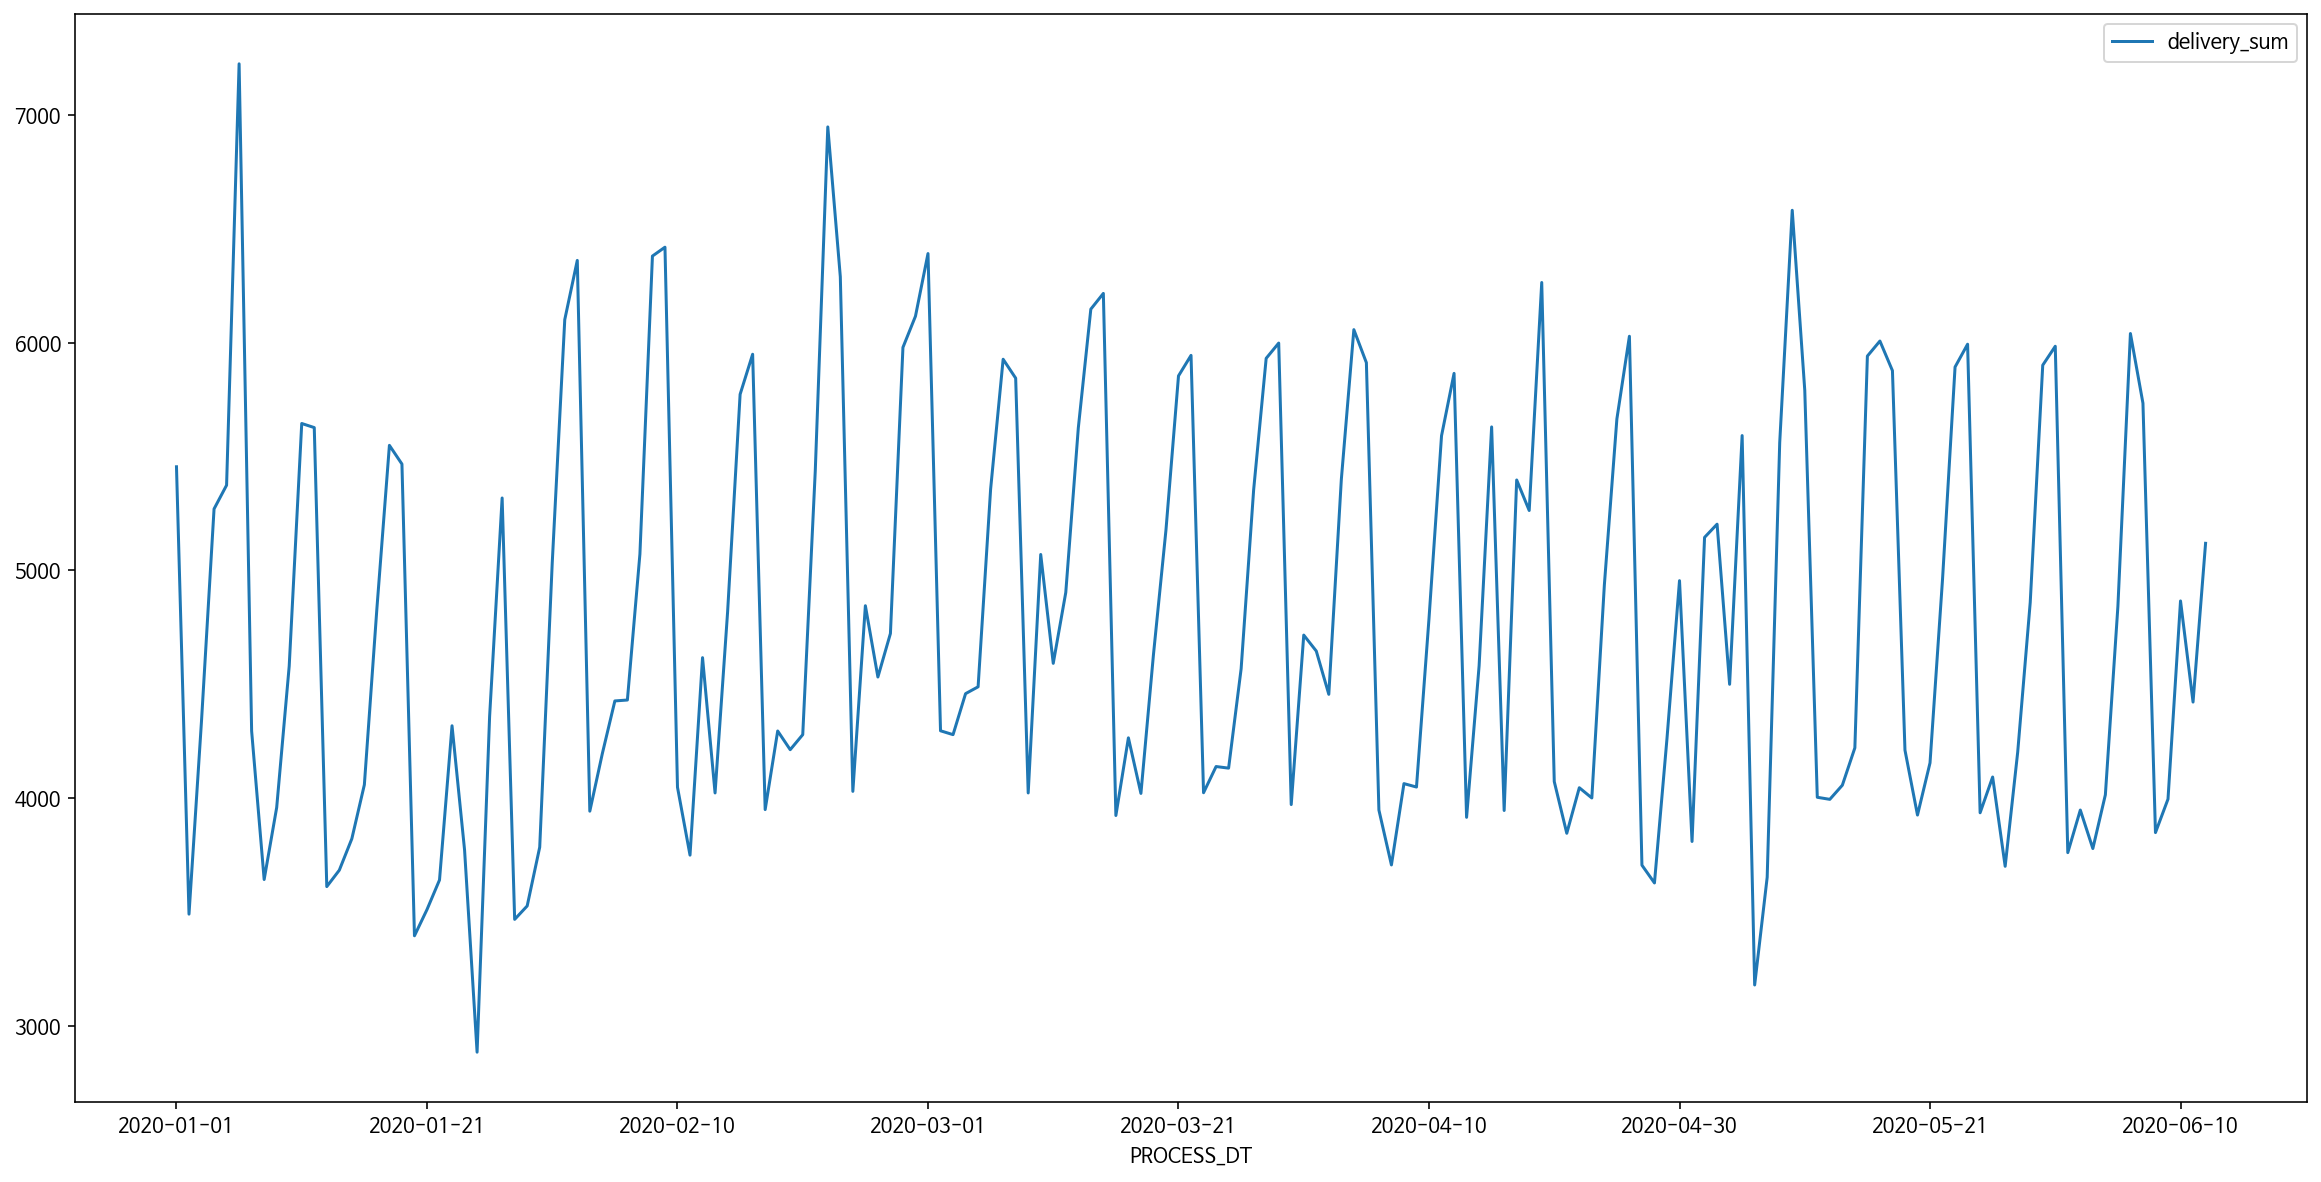

In [16]:
sum_delivery[:-2].plot(figsize=(20,10))

In [17]:
# sns.set_style('darkgrid')
# sns.lmplot(data=sum_delivery, size=10)
# plt.show()

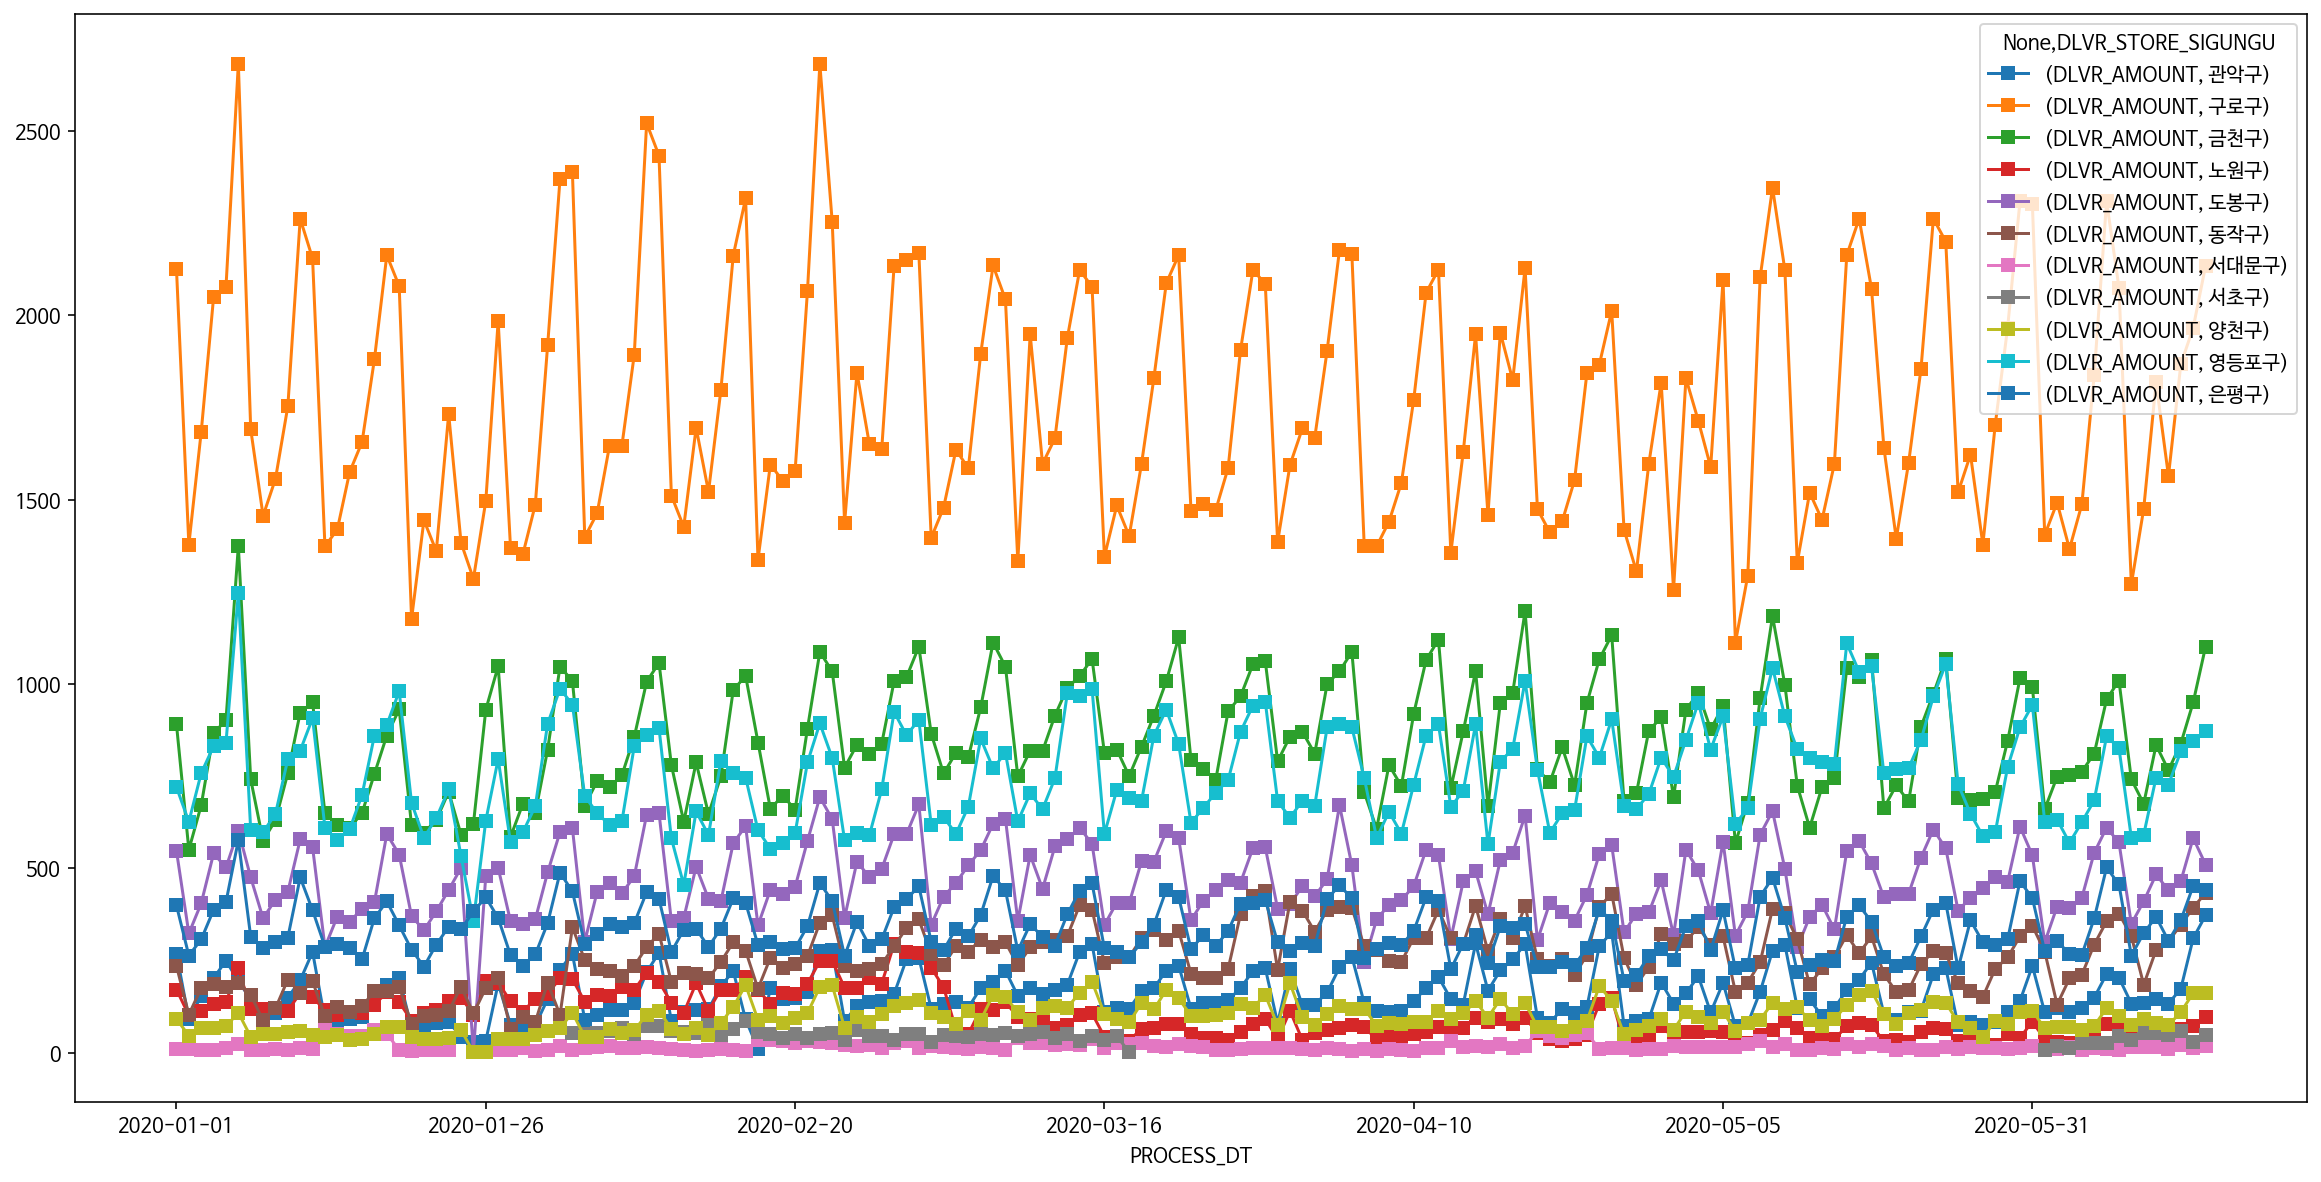

In [18]:
df_pivot.plot(figsize=(20,10), marker='s')

In [19]:
path = "/content/drive/My Drive/Phoenix/PJM/sum_fpop_11.csv"
fpop_sum = pd.read_csv(path)

In [20]:
fpop_sum.head()

,base_ymd,fpop_sum
0,2020-01-01,18451576
1,2020-01-02,22595079
2,2020-01-03,23879505
3,2020-01-04,22129088
4,2020-01-05,19234238


In [21]:
fpop_sum.shape

(168, 2)

In [22]:
# group_count = df.groupby(["PROCESS_DT", "DLVR_STORE_INDUTY_NM"])["DLVR_AMOUNT"].sum().unstack()
# group_count

In [23]:
# group_count.plot(figsize=(25, 10))

In [24]:
# 전체적으로 모두 결제가 상장하는 모습을 나타냈다
# 심부름 수요가 급격히 많아 진 것을 확인 할 수 있다


In [25]:
dic = {
    'base_ymd' : sum_delivery.index,
    'fpop_sum' : sum_delivery['delivery_sum']
}
sum_delivery = pd.DataFrame(dic)
sum_delivery.head(2)

,base_ymd,fpop_sum
PROCESS_DT,,
2020-01-01,2020-01-01,5455
2020-01-02,2020-01-02,3491


In [26]:
sum_delivery.reset_index(inplace=True, drop=True)
#df.reindex(index=[i for i in range(len(df.index))])
sum_delivery.head(2)

,base_ymd,fpop_sum
0,2020-01-01,5455
1,2020-01-02,3491


In [27]:
delivery_fpop=pd.merge(sum_delivery[:-2], fpop_sum, how='left', on='base_ymd')
delivery_fpop.head()

,base_ymd,fpop_sum_x,fpop_sum_y
0,2020-01-01,5455,18451576
1,2020-01-02,3491,22595079
2,2020-01-03,4341,23879505
3,2020-01-04,5270,22129088
4,2020-01-05,5374,19234238


In [28]:
delivery_fpop.columns = ['date', 'delivery_sum', 'fpop_sum']

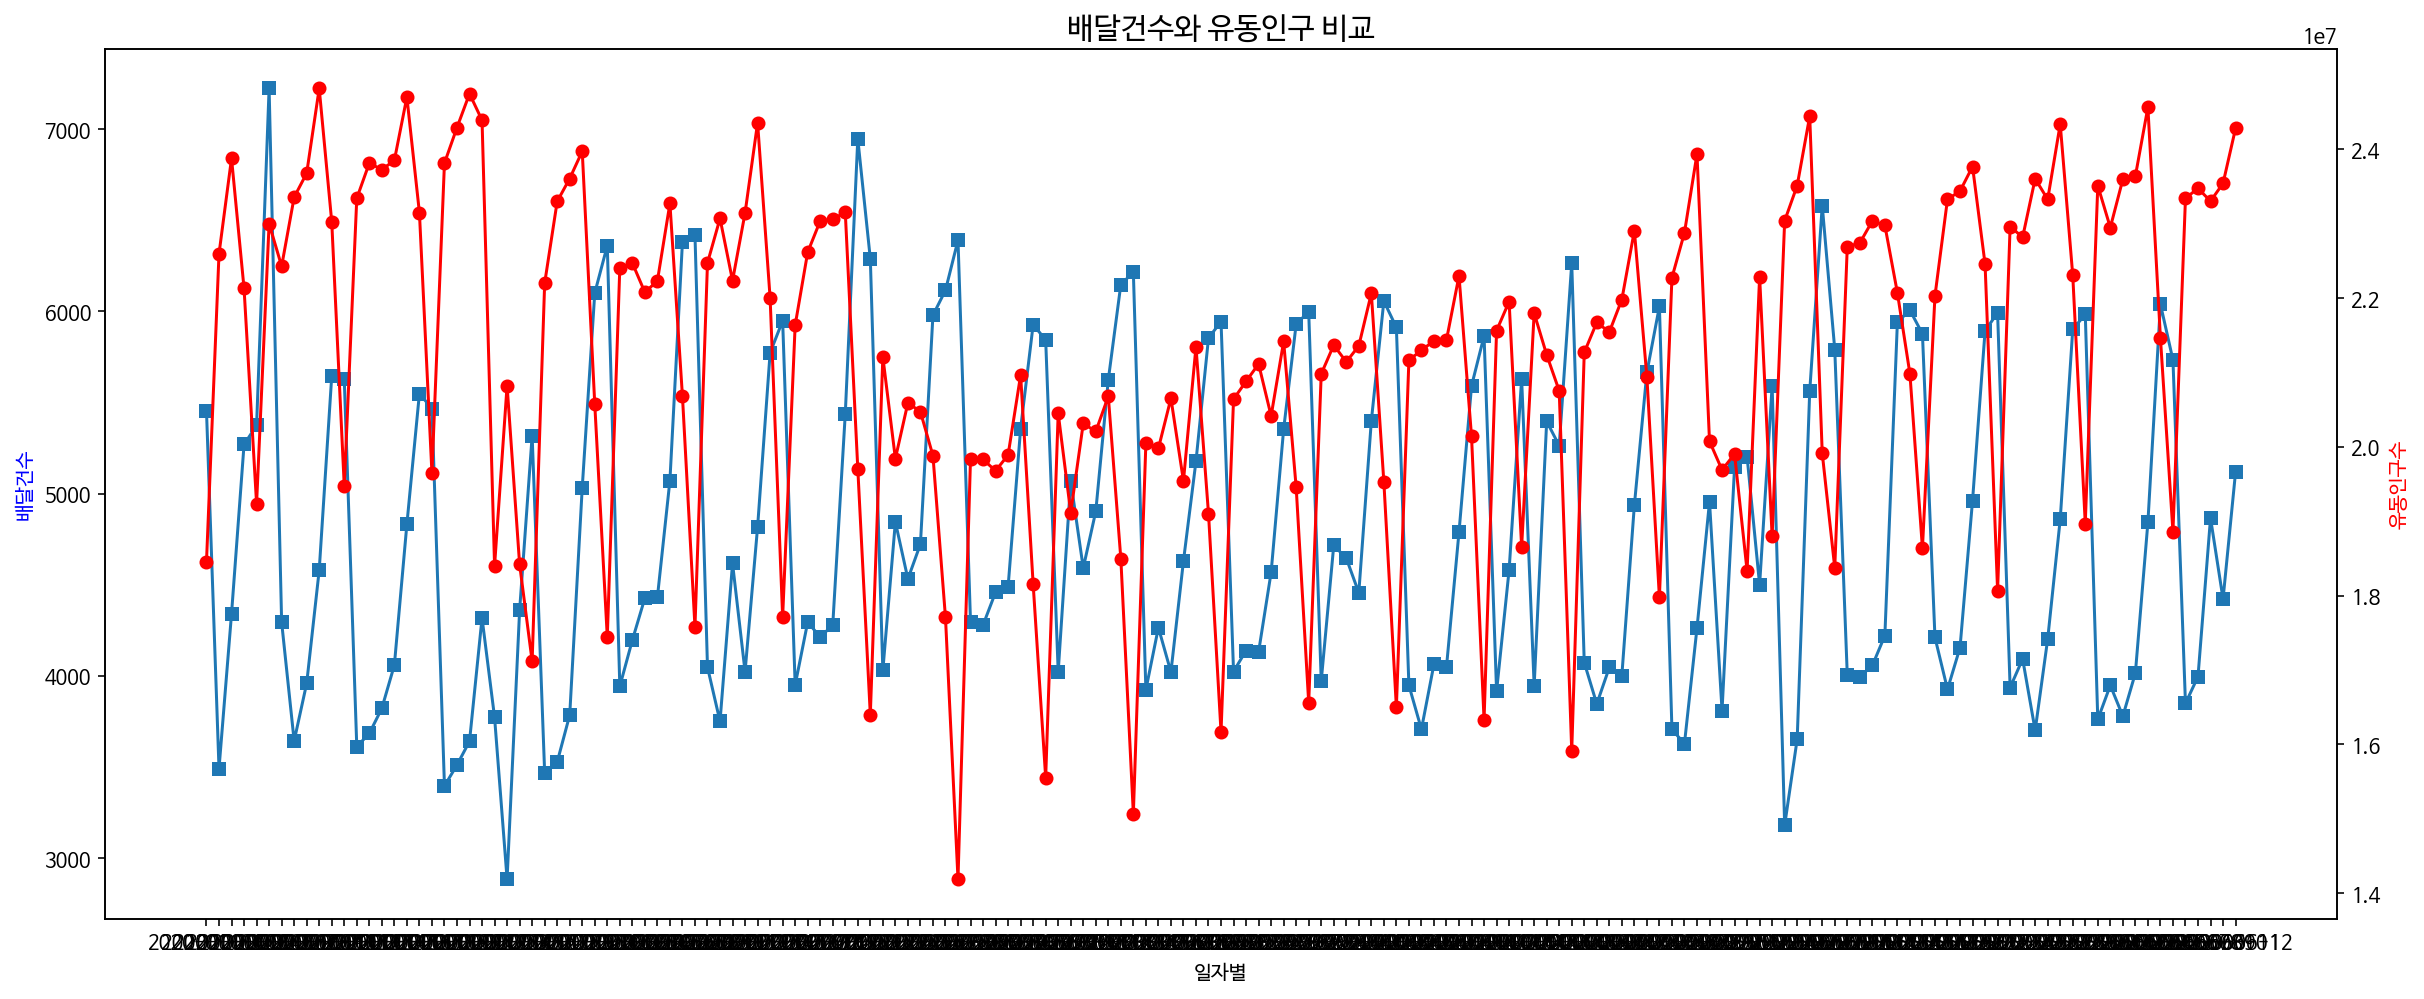

In [29]:
fg, ax1 = plt.subplots()
fg.set_size_inches(20,8)

ax2 = ax1.twinx()
ax1.plot(delivery_fpop['date'], delivery_fpop['delivery_sum'], marker='s')
ax2.plot(delivery_fpop['date'], delivery_fpop['fpop_sum'], marker='o', color="red" )

ax1.set_xlabel('일자별')

ax1.set_ylabel('배달건수', color='b')
ax2.set_ylabel('유동인구수', color='r')

plt.title('배달건수와 유동인구 비교', size = 15)

plt.show()

TypeError: ignored

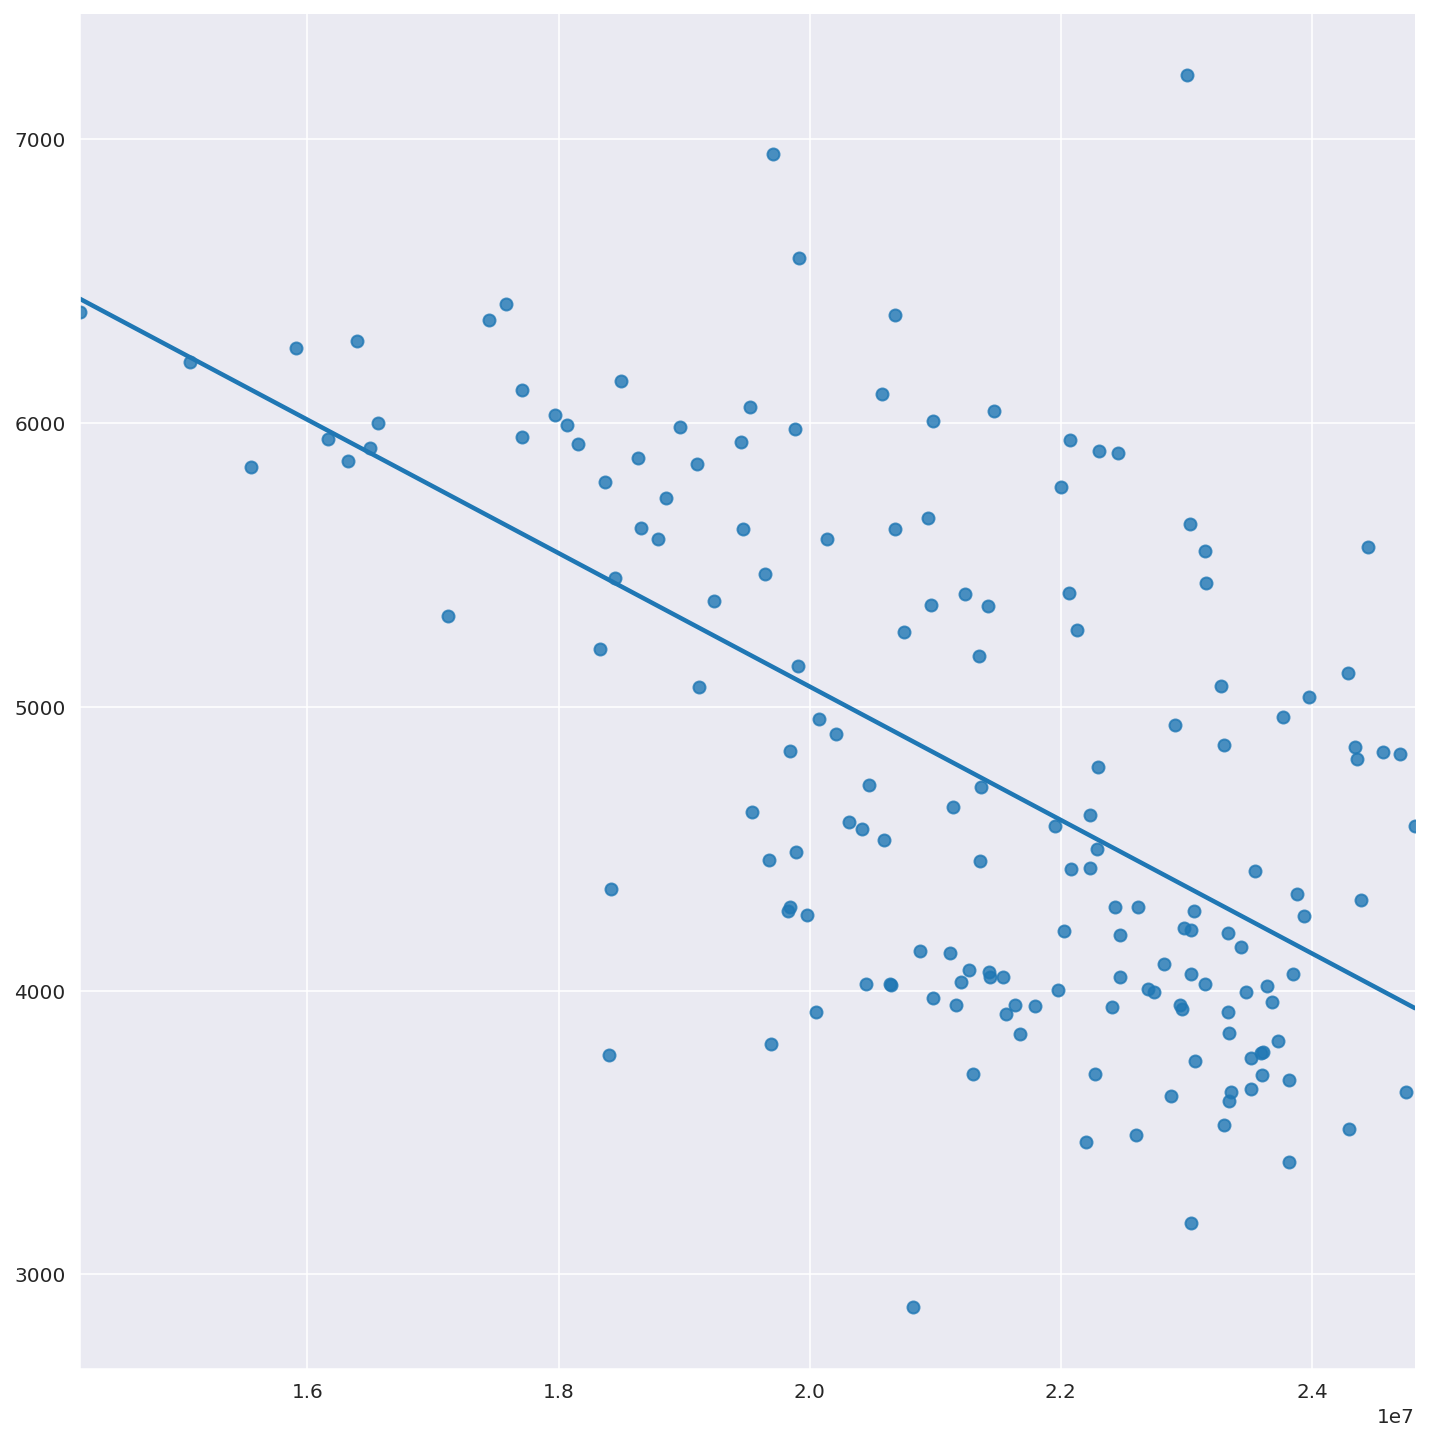

In [30]:
sns.set_style('darkgrid')
sns.lmplot(x='fpop_sum', y='delivery_sum', data=delivery_fpop, height=10)
plt.show()

In [ ]:
# 주별 합계(01/06~ 06/07)
# for i in range(5,138,7):
#   print(np.sum(delivery_fpop.iloc[:,1:][i:i+7]))
#   break

In [31]:
delivery_fpop[ delivery_fpop.date =='2020-05-19']

,date,delivery_sum,fpop_sum
138,2020-05-19,4211,22028935


In [32]:
delivery_fpop.tail()

,date,delivery_sum,fpop_sum
158,2020-06-08,3849,23342463
159,2020-06-09,3996,23475825
160,2020-06-10,4866,23303125
161,2020-06-11,4422,23542998
162,2020-06-12,5119,24283340


In [33]:
weekly_sum = pd.DataFrame(columns=['delivery_sum','fpop_sum'])
a = 1
for i in range(5,138,7):  
  weekly_sum.loc[f'{a}주차']=(np.sum(delivery_fpop.iloc[:,1:][i:i+7]))
  a += 1
weekly_sum

,delivery_sum,fpop_sum
1주차,34973.0,159784270.0
2주차,31025.0,162235543.0
3주차,25883.0,154890314.0
4주차,33593.0,148214148.0
5주차,34868.0,150721344.0
6주차,32977.0,154992833.0
7주차,35410.0,149608641.0
8주차,36616.0,133887053.0
9주차,34651.0,133907165.0
10주차,36576.0,134325500.0


In [34]:
weekly_sum.loc['20주차']=(np.sum(delivery_fpop.iloc[:,1:][138:144]))

In [35]:
a = 21
for i in range(144,155,7):  
  weekly_sum.loc[f'{a}주차']=(np.sum(delivery_fpop.iloc[:,1:][i:i+7]))
  a += 1
weekly_sum

,delivery_sum,fpop_sum
1주차,34973.0,159784270.0
2주차,31025.0,162235543.0
3주차,25883.0,154890314.0
4주차,33593.0,148214148.0
5주차,34868.0,150721344.0
6주차,32977.0,154992833.0
7주차,35410.0,149608641.0
8주차,36616.0,133887053.0
9주차,34651.0,133907165.0
10주차,36576.0,134325500.0


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

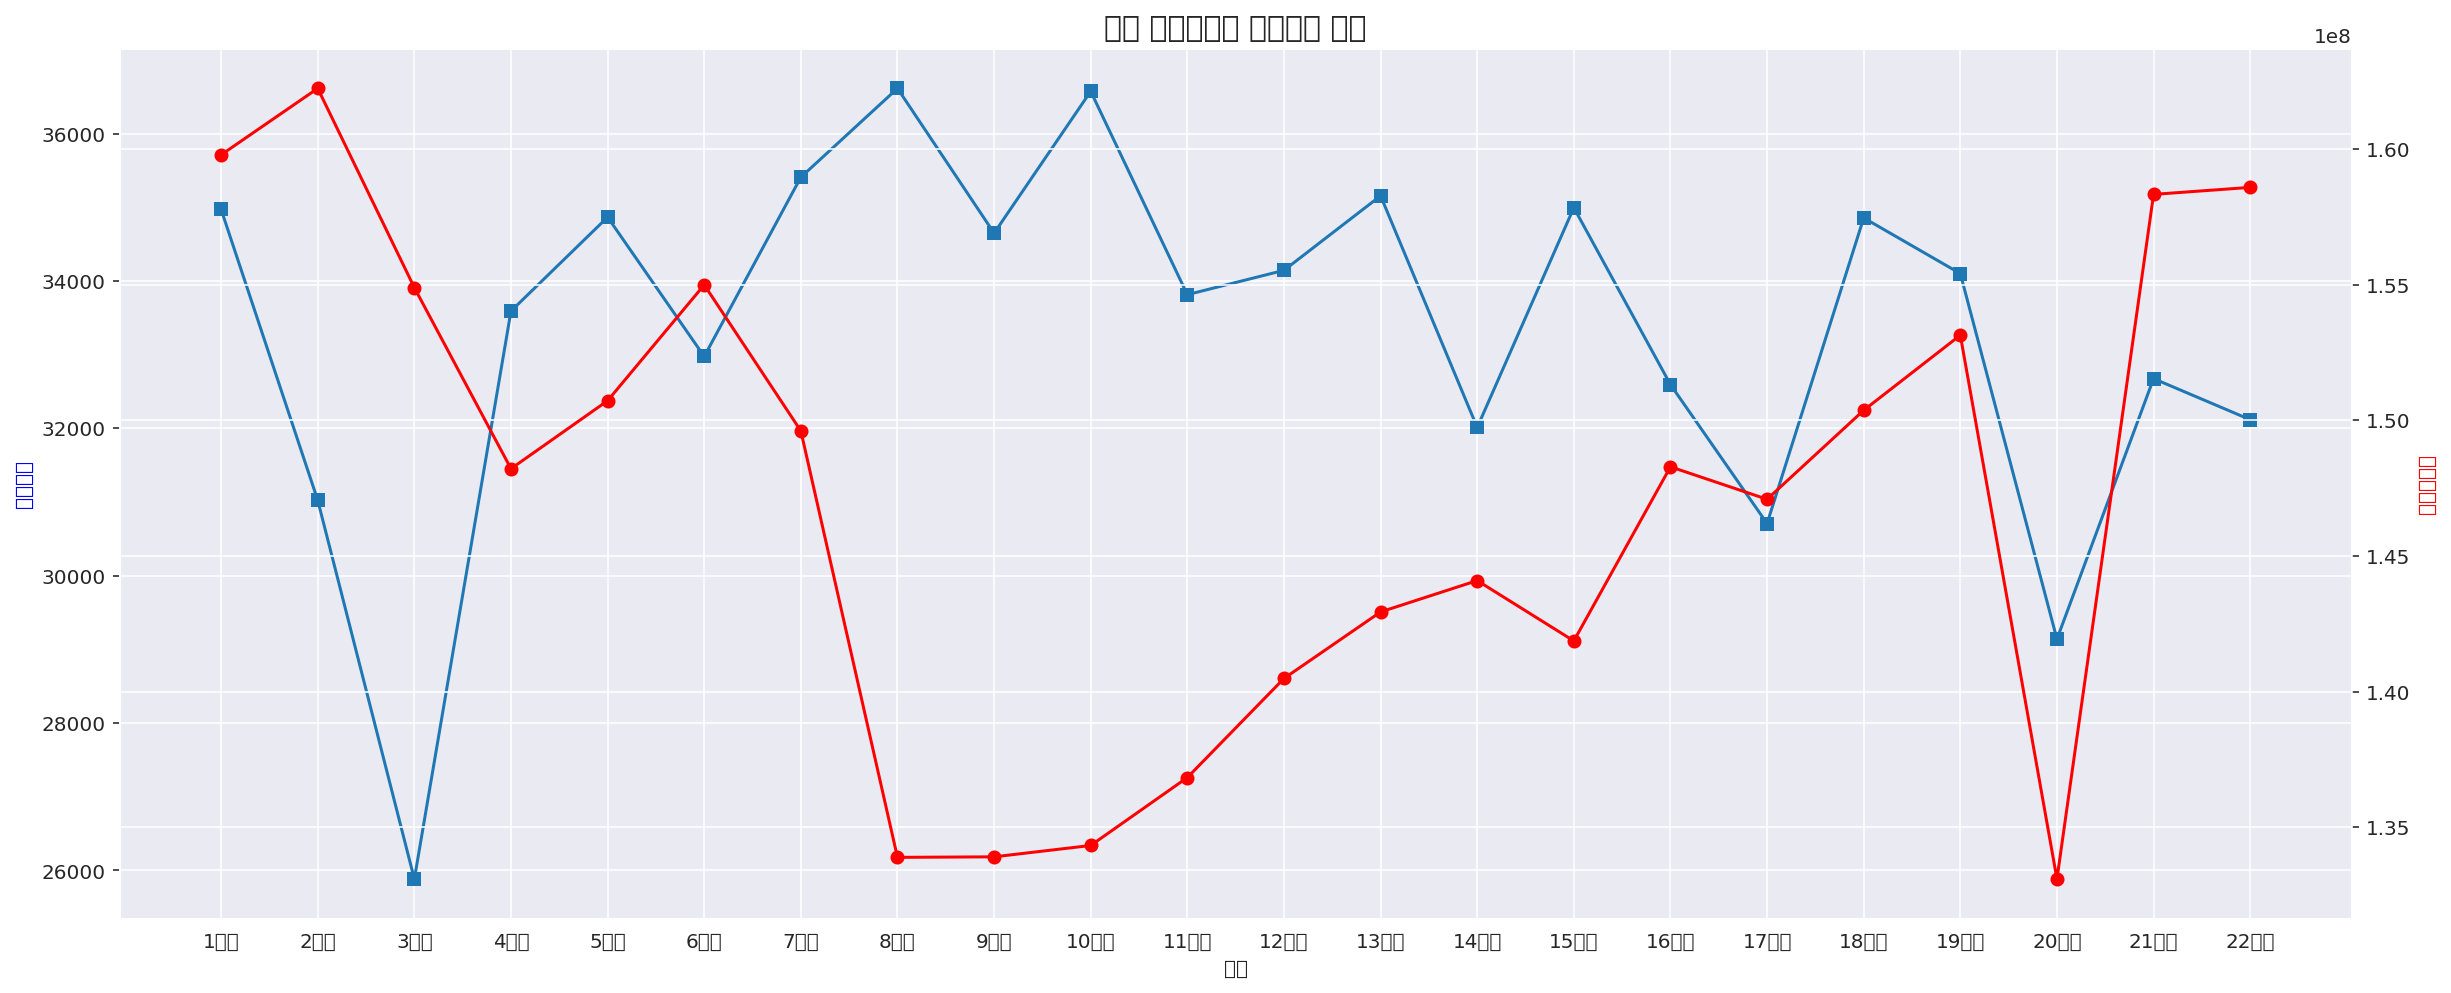

In [36]:
#20주차에 5월 18일 데이터가 빠져있음
fg, ax1 = plt.subplots()
fg.set_size_inches(20,8)

ax2 = ax1.twinx()
ax1.plot(weekly_sum.index, weekly_sum['delivery_sum'], marker='s')
ax2.plot(weekly_sum.index, weekly_sum['fpop_sum'], marker='o', color="red" )

ax1.set_xlabel('주차')

ax1.set_ylabel('배달건수', color='b')
ax2.set_ylabel('유동인구수', color='r')

plt.title('주별 배달건수와 유동인구 비교', size = 15)

plt.show()